In [1]:
import pandas as pd
import numpy as np
import collections
import re

In [2]:
f=open("text.txt")
doc1=f.read()
f.close()



In [3]:

doc1

'Game of Thrones is the best T.V series\nGame of Thrones is a really great T.V series\nGame of Thrones is very good Series'

In [4]:
l_doc1 = re.sub(r"[^a-zA-Z0-9]", " ", doc1.lower()).split()


In [5]:
l_doc1

['game',
 'of',
 'thrones',
 'is',
 'the',
 'best',
 't',
 'v',
 'series',
 'game',
 'of',
 'thrones',
 'is',
 'a',
 'really',
 'great',
 't',
 'v',
 'series',
 'game',
 'of',
 'thrones',
 'is',
 'very',
 'good',
 'series']

In [6]:
l=l_doc1

In [7]:
l

['game',
 'of',
 'thrones',
 'is',
 'the',
 'best',
 't',
 'v',
 'series',
 'game',
 'of',
 'thrones',
 'is',
 'a',
 'really',
 'great',
 't',
 'v',
 'series',
 'game',
 'of',
 'thrones',
 'is',
 'very',
 'good',
 'series']

In [8]:
wordset=set(l)

In [9]:
wordset

{'a',
 'best',
 'game',
 'good',
 'great',
 'is',
 'of',
 'really',
 'series',
 't',
 'the',
 'thrones',
 'v',
 'very'}

In [10]:
def calculateBOW(wordset,l_doc):
  tf_diz = dict.fromkeys(wordset,0)
  for word in l_doc:
      tf_diz[word]=l_doc.count(word)
  return tf_diz

In [11]:
bow1 = calculateBOW(wordset,l_doc1)
df_bow = pd.DataFrame([bow1])
df_bow.head()

,is,game,best,series,good,great,v,very,t,thrones,a,of,really,the
0,3,3,1,3,1,1,2,1,2,3,1,3,1,1


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [13]:
X = vectorizer.fit_transform([doc1])
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
df_bow_sklearn.head()

,best,game,good,great,is,of,really,series,the,thrones,very
0,1,3,1,1,3,3,1,3,1,3,1


In [14]:
print(vectorizer.get_feature_names_out())

['best' 'game' 'good' 'great' 'is' 'of' 'really' 'series' 'the' 'thrones'
 'very']


In [15]:
import nltk
nltk.download('punkt')
import re
import numpy as np

f= open("text.txt")
text=f.read()
f.close()
dataset = nltk.sent_tokenize(text)
for i in range(len(dataset)):
    dataset[i] = dataset[i].lower()
    dataset[i] = re.sub(r'\W', ' ', dataset[i])
    dataset[i] = re.sub(r'\s+', ' ', dataset[i])

[nltk_data] Downloading package punkt to /home/student/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
print(dataset)

['game of thrones is the best t v series game of thrones is a really great t v series game of thrones is very good series']


In [17]:
word2count = {}
for data in dataset:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [18]:
word2count

{'game': 3,
 'of': 3,
 'thrones': 3,
 'is': 3,
 'the': 1,
 'best': 1,
 't': 2,
 'v': 2,
 'series': 3,
 'a': 1,
 'really': 1,
 'great': 1,
 'very': 1,
 'good': 1}

In [19]:
words


['game',
 'of',
 'thrones',
 'is',
 'the',
 'best',
 't',
 'v',
 'series',
 'game',
 'of',
 'thrones',
 'is',
 'a',
 'really',
 'great',
 't',
 'v',
 'series',
 'game',
 'of',
 'thrones',
 'is',
 'very',
 'good',
 'series']

In [20]:
len(words)

26

In [21]:
vocab_size = len(wordset)
embed_dim = 10
context_size = 4

In [22]:
word_to_ix = {word: i for i, word in enumerate(wordset)}
ix_to_word = {i: word for i, word in enumerate(wordset)}

In [23]:
word_to_ix

{'is': 0,
 'game': 1,
 'best': 2,
 'series': 3,
 'good': 4,
 'great': 5,
 'v': 6,
 'very': 7,
 't': 8,
 'thrones': 9,
 'a': 10,
 'of': 11,
 'really': 12,
 'the': 13}

In [24]:
ix_to_word

{0: 'is',
 1: 'game',
 2: 'best',
 3: 'series',
 4: 'good',
 5: 'great',
 6: 'v',
 7: 'very',
 8: 't',
 9: 'thrones',
 10: 'a',
 11: 'of',
 12: 'really',
 13: 'the'}

In [25]:
data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])

[(['game', 'of', 'is', 'the'], 'thrones'), (['of', 'thrones', 'the', 'best'], 'is'), (['thrones', 'is', 'best', 't'], 'the'), (['is', 'the', 't', 'v'], 'best'), (['the', 'best', 'v', 'series'], 't')]


In [26]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))

In [27]:
embeddings

array([[0.93830746, 0.56955926, 0.83946591, 0.24899449, 0.03534436,
        0.88709356, 0.46376251, 0.83156363, 0.19759532, 0.23013546],
       [0.11141477, 0.46170685, 0.65571073, 0.52102827, 0.60471188,
        0.2725858 , 0.56986828, 0.5266429 , 0.36351869, 0.22500613],
       [0.32764328, 0.47666979, 0.05722809, 0.94849505, 0.93109616,
        0.09968204, 0.61958121, 0.87341662, 0.00308952, 0.80810127],
       [0.00769126, 0.61193599, 0.05882037, 0.31714134, 0.01503393,
        0.13631718, 0.49124879, 0.92139715, 0.52789282, 0.38286657],
       [0.65161404, 0.42243234, 0.65259731, 0.9561115 , 0.82442867,
        0.00806533, 0.87016832, 0.17331145, 0.92206559, 0.93099686],
       [0.99548691, 0.43836924, 0.85049665, 0.44990255, 0.65685437,
        0.15209092, 0.7498111 , 0.02321127, 0.86264996, 0.36542012],
       [0.31479996, 0.98401197, 0.00920956, 0.91776256, 0.93712308,
        0.62130776, 0.23434447, 0.39974592, 0.73857388, 0.37782787],
       [0.94005024, 0.70902597, 0.2215425

In [28]:
def linear(m, theta):
    w = theta
    return m.dot(w)

In [29]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [30]:
import tensorflow as tf
import keras.backend as k
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

2023-10-09 14:48:21.971850: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-09 14:48:22.098711: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-09 14:48:22.102562: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-09 14:48:22.102589: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

In [31]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1

    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)

    return (- out + softmax) / logits.shape[0]

In [32]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)

    return m, n, o

In [33]:
def backward(preds, theta, target_idxs):
    m, n, o = preds

    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)

    return dw

In [34]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

In [35]:
theta = np.random.uniform(-1, 1, ( context_size * embed_dim, vocab_size))

In [36]:
epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)

        epoch_losses[epoch] = losses

Text(0, 0.5, 'Losses')

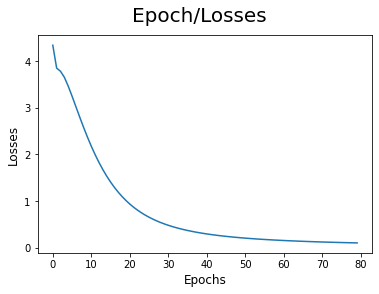

In [37]:
import matplotlib.pyplot as plt
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [38]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]

    return word
predict(['is', 'great', 'of', 'game'])

't'

In [39]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1

    return (1 - (wrong / len(data)))
accuracy()

1.0